In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import time
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# 简单分类器实现
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.linear_model import SGDClassifier      # 随机梯度
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支撑向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.model_selection import cross_val_score # 交叉验证计算accuracy
from sklearn.model_selection import GridSearchCV    # 网格搜索，获取最优参数
from sklearn.model_selection import StratifiedKFold # 交叉验证
from collections import Counter
# 评估指标
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier # 集成学习
from xgboost import XGBClassifier                   # 极限梯度提升树
from lightgbm import LGBMClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [113]:
# 加载数据文件
df = pd.read_csv("123456.csv")
df

,个人编码,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,RES
0,3.520000e+14,-0.711585,0.268360,0.620463,-0.257605,0.365929,0.156760,0.586487,0
1,3.520000e+14,-2.562911,-0.430748,0.123313,0.464867,-0.019657,0.490553,0.385173,0
2,3.520000e+14,-0.170068,0.368069,-1.123696,0.502706,0.396691,0.128573,0.737117,0
3,3.520000e+14,-1.482280,-1.053758,-2.240689,0.445834,-0.526743,1.223371,0.549901,0
4,3.520000e+14,-1.189630,-0.156667,0.102437,1.419124,0.537844,0.097837,-0.341772,0
...,...,...,...,...,...,...,...,...,...
15995,3.520000e+14,-1.102459,1.200239,-0.109399,0.636243,0.258450,0.381565,0.804104,0
15996,3.520000e+14,-1.456572,0.930859,-0.811483,0.184001,0.432302,0.252683,-0.125430,0
15997,3.520000e+14,1.604018,-0.387071,-0.301185,1.097626,-1.207987,-0.258034,-0.031498,0
15998,3.520000e+14,1.477636,-2.154569,1.748471,1.507942,-0.614453,0.313432,-0.327694,0


In [114]:
df.columns#标签读取

Index(['个人编码', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'RES'], dtype='object')

In [115]:
X = df.drop('RES', axis=1) # 数据集
y = df['RES'] # 标签


In [116]:


X_new_1_train, X_new_1_test, y_new_1_train, y_new_1_test = train_test_split(X, y, random_state=42)

#数据集
X_new_1_train = X_new_1_train.values
X_new_1_test = X_new_1_test.values

#标签
y_new_1_train = y_new_1_train.values
y_new_1_test = y_new_1_test.values

In [128]:

gbm=lgb.LGBMClassifier(objective='binary',learning_rate=0.05,verbose=-1)
classifiers = {
    'LogisticRegression':LogisticRegression(), # 逻辑回归
    #"SVC":SVC(),                               # 支撑向量机
    "KNN":KNeighborsClassifier(),              # K近邻
    'DT':DecisionTreeClassifier(),             # 决策树
    #'RFC':RandomForestClassifier(),            # 随机森林
    'Bagging':BaggingClassifier(),             # 集成学习bagging
    'SGD':SGDClassifier(),                     # 随机梯度
    'GBC':GradientBoostingClassifier(),        # 集成学习Gradient
    #'xgb':XGBClassifier(),                      # 极限梯度提升树
    'lgb':gbm    
}

In [129]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items(): # 遍历每一个分类器，分别训练、计算得分
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5折交叉验证
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

In [130]:
accuracy_score(X_new_1_train, y_new_1_train)#训练交叉验证的结果

Classifier Name :  LogisticRegression   Training Score ： 95.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 96.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 93.0 %
Classifier Name :  BaggingClassifier   Training Score ： 96.0 %
Classifier Name :  SGDClassifier   Training Score ： 95.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 96.0 %
Classifier Name :  LGBMClassifier   Training Score ： 96.0 %


In [120]:
# 网格搜索：获取最优超参数
# 1 LR
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10]
    }

    LR_gs = GridSearchCV(LogisticRegression(),param_grid=LR_param, n_jobs=12, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_ # 最优参数
    
    return LR_estimators

In [121]:
# 2 KNN
def KNN_gs(X_train, y_train):
    KNN_param = {
        'n_neighbors':list(range(1, 11, 1)),
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=12, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_ # 最优参数
    
    return KNN_estimators

In [122]:
# 4 DT
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2, 5, 1)), # 树的深度
        'min_samples_leaf':list(range(3, 7, 1)) # 最小叶子节点数
    }

    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=12, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_ # 最优参数
    
    return DT_estimators

In [123]:
# 6 Bag
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':list(range(10, 120, 10)),    
    }
    
    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=12, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)
    
    BAG_estimators = BAG_gs.best_estimator_
    
    return BAG_estimators

In [124]:
# 7 SGD
def SGD_gs(X_train, y_train):
    SGD_param = {
        'penalty':['l2','l1'],
        'max_iter':[1000, 1500, 2000]
    }
    
    SGD_gs = GridSearchCV(SGDClassifier(), param_grid=SGD_param, n_jobs=12, scoring='accuracy')
    SGD_gs.fit(X_train, y_train)
    
    SGD_estimators = SGD_gs.best_estimator_
    
    return SGD_estimators

In [126]:
# 9 lgb
def LGB_gs(X_train, y_train):
    LGB_param = {
        'max_depth':[4,5,6],
        #'learning_rate': [0.01,0.05, 0.1],
        'feature_fraction': [0.6,0.7, 0.8],
        'num_leaves': list(range(40, 60, 10)),
    }
    
    LGB_gs = GridSearchCV(gbm, param_grid=LGB_param, n_jobs=12, scoring='accuracy')
    LGB_gs.fit(X_train, y_train)
    
    LGB_estimators = LGB_gs.best_estimator_
    
    return LGB_estimators

In [127]:
# 采用新的数据集：X_new_1_train, y_new_1_train

# 模型交叉验证、训练，获取最优超参数

LR_best_estimator = LR_gs(X_new_1_train, y_new_1_train)

KNN_best_estimator = KNN_gs(X_new_1_train, y_new_1_train)

DT_best_estimator = DT_gs(X_new_1_train, y_new_1_train)

BAG_best_estimator = BAG_gs(X_new_1_train, y_new_1_train)

SGD_best_estimator = SGD_gs(X_new_1_train, y_new_1_train)

LGB_best_estimator = LGB_gs(X_new_1_train, y_new_1_train)

In [97]:
feats = [f for f in X.columns if f not in ['个人编码']]
len(feats)

7

<Figure size 1800x2900 with 0 Axes>

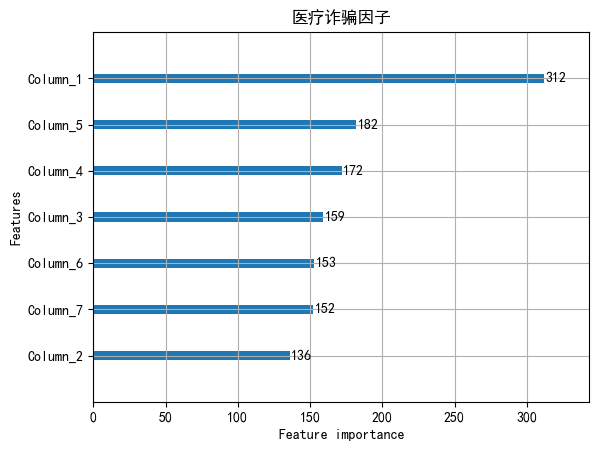

In [98]:
import lightgbm as lgb
plt.figure(figsize=(18,29),facecolor='red',frameon=False)
lgb.plot_importance(LGB_best_estimator, max_num_features=30)
plt.title("医疗诈骗因子")
plt.show()

In [99]:
# 预测新的数据集：X_new_test, y_new_test
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

result_df = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','Bagging','SGD','LGB'])

def caculate(models, X_test, y_test):
    # 计算各种参数的值
    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []
    
    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) # 计算准确度
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred) # 计算：精确度，召回率，f1_score
        AUC_ROC = roc_auc_score(y_test, y_pred) # 计算ROC, AUC
        
        # 保存计算值
        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
        
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results

In [100]:
# 将所有最优超参数的模型放在一起
best_models = [LR_best_estimator, KNN_best_estimator, DT_best_estimator,
               BAG_best_estimator, SGD_best_estimator,LGB_best_estimator]

# 调用函数计算各项指标值
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models, X_new_1_test, y_new_1_test)

# 将各项值放入到DataFrame中
result_df['Accuracy'] = accuracy_results
result_df['F1-score'] = F1_score_results
result_df['Recall'] = Recall_results
result_df['Precision'] = Precision_results
result_df['AUC_ROC'] = AUC_ROC_results

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [101]:
result_df

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.95050,"[0.9746218918226096, 0.0]","[1.0, 0.0]","[0.9505, 0.0]",0.500000
KNN,0.95825,"[0.9784154064883028, 0.3650190114068441]","[0.9955286691215149, 0.24242424242424243]","[0.9618805590851334, 0.7384615384615385]",0.618976
DT,0.95600,"[0.9772433410912853, 0.3383458646616541]","[0.9939505523408733, 0.22727272727272727]","[0.961088504577823, 0.6617647058823529]",0.610612
Bagging,0.96025,"[0.9793801063415898, 0.4498269896193771]","[0.9931614939505523, 0.3282828282828283]","[0.9659759529291378, 0.7142857142857143]",0.660722
SGD,0.95050,"[0.9746218918226096, 0.0]","[1.0, 0.0]","[0.9505, 0.0]",0.500000
LGB,0.96125,"[0.9799456592055894, 0.4280442804428044]","[0.9960547080483956, 0.29292929292929293]","[0.964349376114082, 0.7945205479452054]",0.644492


In [102]:
# 将上述3个模型集成起来，当做一个模型


voting_clf = VotingClassifier(estimators=[('DT', DT_best_estimator),('KNN', KNN_best_estimator), ('BAG', BAG_best_estimator), 
                                          ('LGB', LGB_best_estimator)], n_jobs=12)

In [103]:
# 训练
voting_clf.fit(X_new_1_train, y_new_1_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_leaf=3)),
                             ('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('BAG', BaggingClassifier(n_estimators=80)),
                             ('LGB',
                              LGBMClassifier(feature_fraction=0.8,
                                             learning_rate=0.05, max_depth=4,
                                             num_leaves=40))],
                 n_jobs=12)

In [104]:
import joblib


# Save to file in the current working directory
joblib_file = "voting_clf1.pkl"  
joblib.dump(voting_clf, joblib_file)

# Load from file
joblib_model = joblib.load(joblib_file)

# Calculate the accuracy and predictions
score = joblib_model.score(X_new_1_train, y_new_1_train)  
print("Test score: {0:.2f} %".format(100 * score))  
y_final_pred = voting_clf.predict(X_new_1_test)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Test score: 96.23 %
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [105]:
# 预测
y_final_pred = voting_clf.predict(X_new_1_test)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [106]:
print(classification_report(y_new_1_test,y_final_pred ))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3802
           1       0.76      0.23      0.35       198

    accuracy                           0.96      4000
   macro avg       0.86      0.61      0.66      4000
weighted avg       0.95      0.96      0.95      4000



In [107]:
y_final_pred=pd.DataFrame(y_final_pred)
X_new_1_test=pd.DataFrame(X_new_1_test)

In [108]:
nmsl = pd.concat([X_new_1_test, y_final_pred],axis=1).reset_index(drop=True)

In [109]:
nmsl.columns = df.columns

In [110]:
xlsb=nmsl[nmsl['RES'].isin([1])]

In [111]:
xlsb

,个人编码,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,RES
308,3.520000e+14,18.421208,0.068125,-0.812145,-1.084528,1.003137,3.446834,1.811956,1
389,3.520000e+14,12.700318,-2.372387,-3.804873,-0.259428,-0.574895,-0.727980,0.519009,1
425,3.520000e+14,14.181229,0.579039,2.922071,1.420928,-0.857134,-2.253559,0.811371,1
554,3.520000e+14,15.087378,4.049294,2.081371,0.406179,-2.260426,-2.568989,5.108086,1
560,3.520000e+14,16.004017,3.485638,1.906184,1.452532,-0.962658,-1.629770,4.103534,1
652,3.520000e+14,13.797982,4.891778,0.920448,0.379501,-1.242543,-1.363049,2.777846,1
676,3.520000e+14,20.810256,5.028016,2.985974,-0.942205,-1.532029,-1.819307,6.204952,1
688,3.520000e+14,16.064489,-1.413961,-0.269692,-6.168735,0.820856,-0.544467,2.230760,1
705,3.520000e+14,14.054535,-1.741462,-3.894583,0.955295,-0.578148,-0.819364,-0.271513,1
726,3.520000e+14,20.085658,4.925087,3.346181,-0.049570,-1.707095,-1.082065,5.548164,1


In [33]:
xlsb.to_csv('test.csv',index=False)